In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
path = "C:/Users/Phung Ha/Desktop/Data_final_file/WT_Data_after_preprocessing.csv"
df = pd.read_csv(path)

In [2]:
df_full = df.iloc[:,1:3]

In [3]:
#chọn số cụm, tạo ma trận cụm
X = np.array(df_full).reshape(-1,2)
k=5
p=2
n=len(X)
d = len(X[0])
addZeros = np.zeros((n, 1))
X = np.append(X, addZeros, axis=1)
C = np.zeros((k,d+1))
print("The FCM algorithm: \n")
print("The training data: \n", X)
print("\nTotal number of data: ",n)
print("Total number of features: ",d)
print("Total number of Clusters: ",k)

The FCM algorithm: 

The training data: 
 [[1994.35743433   14.33840323    0.        ]
 [1984.154051     14.26286127    0.        ]
 [1998.9528615    14.86438659    0.        ]
 ...
 [1993.21669533   13.28333314    0.        ]
 [1934.66666667   12.73333343    0.        ]
 [1643.9333495    10.88333337    0.        ]]

Total number of data:  7747
Total number of features:  2
Total number of Clusters:  5


In [4]:
#tạo weight random vào ma trận cụm
weight = np.random.dirichlet(np.ones(k),size=n)
print("\nThe initial weight: \n", np.round(weight,2))


The initial weight: 
 [[0.04 0.31 0.1  0.16 0.39]
 [0.14 0.4  0.22 0.18 0.05]
 [0.19 0.34 0.24 0.   0.23]
 ...
 [0.28 0.05 0.16 0.26 0.26]
 [0.05 0.16 0.14 0.22 0.43]
 [0.19 0.   0.5  0.19 0.11]]


In [5]:
#xuất final weight, data thuộc về các cụm
for it in range(10): # Total number of iterations
        # Compute centroid
    for j in range(k):
        denoSum = sum(np.power(weight[:,j],2))
        sumMM =0
        for i in range(n):
            mm = np.multiply(np.power(weight[i,j],p),X[i,:])
            sumMM +=mm
        cc = sumMM/denoSum
        C[j] = np.reshape(cc,d+1)
    
 
    # print("\nUpdating the fuzzy pseudo partition")
    for i in range(n):
        denoSumNext = 0
        for j in range(k):
             denoSumNext += np.power(1/distance.euclidean(C[j,0:d], X[i,0:d]),1/(p-1))
        for j in range(k):
            w = np.power((1/distance.euclidean(C[j,0:d], X[i,0:d])),1/(p-1))/denoSumNext
            weight[i,j] = w  
            
print("\nThe final weights: \n", np.round(weight,2))


The final weights: 
 [[0.12 0.07 0.06 0.66 0.08]
 [0.12 0.07 0.06 0.68 0.08]
 [0.13 0.07 0.06 0.66 0.08]
 ...
 [0.12 0.07 0.06 0.67 0.08]
 [0.1  0.05 0.05 0.74 0.06]
 [0.18 0.08 0.07 0.57 0.1 ]]


In [6]:
for i in range(n):    
    cNumber = np.where(weight[i] == np.amax(weight[i]))
    X[i,d] = cNumber[0]
    
print("\nThe data with cluster number: \n", X)


The data with cluster number: 
 [[1994.35743433   14.33840323    3.        ]
 [1984.154051     14.26286127    3.        ]
 [1998.9528615    14.86438659    3.        ]
 ...
 [1993.21669533   13.28333314    3.        ]
 [1934.66666667   12.73333343    3.        ]
 [1643.9333495    10.88333337    3.        ]]


In [7]:
#đưa Cluster vào df
df.insert(4,"Cluster",X[:,2],True)

In [8]:
#xuất số lượng Data từng cụm
a0 = df.value_counts(df['Cluster']==0)
a1 = df.value_counts(df['Cluster']==1)
a2 = df.value_counts(df['Cluster']==2)
a3 = df.value_counts(df['Cluster']==3)
a4 = df.value_counts(df['Cluster']==4)
print('Number data of Cluster 0: ',a0)
print('Number data of Cluster 1: ',a1)
print('Number data of Cluster 2: ',a2)
print('Number data of Cluster 3: ',a3)
print('Number data of Cluster 4: ',a4)

Number data of Cluster 0:  Cluster
False    7087
True      660
dtype: int64
Number data of Cluster 1:  Cluster
False    6999
True      748
dtype: int64
Number data of Cluster 2:  Cluster
False    4128
True     3619
dtype: int64
Number data of Cluster 3:  Cluster
False    5724
True     2023
dtype: int64
Number data of Cluster 4:  Cluster
False    7050
True      697
dtype: int64


<Figure size 720x576 with 0 Axes>

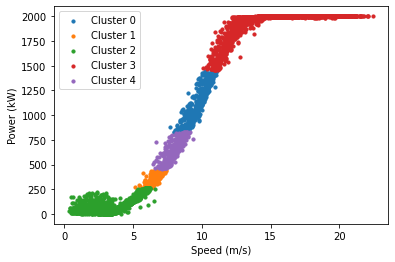

<Figure size 720x576 with 0 Axes>

In [9]:
#visualization
import matplotlib.pyplot as plt
z0 = df.loc[df['Cluster']==0]
z1 = df.loc[df['Cluster']==1]
z2 = df.loc[df['Cluster']==2]
z3 = df.loc[df['Cluster']==3]
z4 = df.loc[df['Cluster']==4]
plt.scatter(z0.Speed,z0.Power,s=10,label = 'Cluster 0')
plt.scatter(z1.Speed,z1.Power,s=10,label = 'Cluster 1')
plt.scatter(z2.Speed,z2.Power,s=10,label = 'Cluster 2')
plt.scatter(z3.Speed,z3.Power,s=10,label = 'Cluster 3')
plt.scatter(z4.Speed,z4.Power,s=10,label = 'Cluster 4')
plt.legend()
plt.xlabel('Speed (m/s)')
plt.ylabel('Power (kW)')
plt.figure(figsize=(10,8))

In [10]:
#xuất centroid
print("Centroid of Cluster 0: ",C[0])
print("Centroid of Cluster 1: ",C[1])
print("Centroid of Cluster 2: ",C[2])
print("Centroid of Cluster 3: ",C[3])
print("Centroid of Cluster 4: ",C[4])

Centroid of Cluster 0:  [1076.46653899    9.77652603    0.        ]
Centroid of Cluster 1:  [342.44137663   5.82034572   0.        ]
Centroid of Cluster 2:  [187.19810581   4.74985415   0.        ]
Centroid of Cluster 3:  [1822.95682004   13.90200674    0.        ]
Centroid of Cluster 4:  [575.15656367   7.24549972   0.        ]


In [11]:
#đưa thành file csv
path_new = "C:/Users/Phung Ha/Desktop/Data_final_file/WT_Data_after_clustering(FCM).csv"
df.to_csv(path_new,index=0)

In [12]:
#tách thành từng file Cluster
df0 = df.loc[df['Cluster']==0]
df1 = df.loc[df['Cluster']==1]
df2 = df.loc[df['Cluster']==2]
df3 = df.loc[df['Cluster']==3]
df4 = df.loc[df['Cluster']==4]
path0 = "C:/Users/Phung Ha/Desktop/Data_final_file/Cluster 4.csv"
df0.to_csv(path0,index=0)
path1 = "C:/Users/Phung Ha/Desktop/Data_final_file/Cluster 2.csv"
df1.to_csv(path1,index=0)
path2 = "C:/Users/Phung Ha/Desktop/Data_final_file/Cluster 1.csv"
df2.to_csv(path2,index=0)
path3 = "C:/Users/Phung Ha/Desktop/Data_final_file/Cluster 5.csv"
df3.to_csv(path3,index=0)
path4 = "C:/Users/Phung Ha/Desktop/Data_final_file/Cluster 3.csv"
df4.to_csv(path4,index=0)